In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)

_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

In [ ]:
y_pred = logistic.predict(X)

_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


<Axes: >

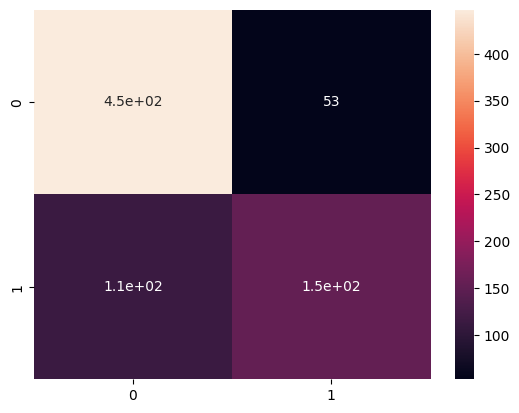

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [ ]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)

In [ ]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

In [ ]:
metrics.accuracy_score(y, y_pred_poly)

0.7239583333333334

1 Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
#1

from sklearn.metrics import classification_report

print("Метрики для обычной логистической регрессии:")
print(classification_report(y, y_pred))
print("Метрики для полиномиальной логистической регрессии:")
print(classification_report(y, y_pred_poly))
print("Матрица ошибок для полиномиальной логистической регрессии:")
print(metrics.confusion_matrix(y, y_pred_poly))

Метрики для обычной логистической регрессии:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768

Метрики для полиномиальной логистической регрессии:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       500
           1       0.62      0.55      0.58       268

    accuracy                           0.72       768
   macro avg       0.69      0.68      0.69       768
weighted avg       0.72      0.72      0.72       768

Матрица ошибок для полиномиальной логистической регрессии:
[[409  91]
 [121 147]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров для поиска оптимального C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logistic = LogisticRegression()

grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X, y)

print("Наилучший параметр C:", grid_search.best_params_)
print("Лучшее значение качества:", grid_search.best_score_)

2 Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
Метод опорных векторов
Без ядра
С линейным ядром
С гауссовым ядром
С полиномиальным ядром
Метод ближайших соседей
Многослойный перцептрон
Дерево решений
Наивный байесовский классификатор
(*) Другие методы:
Пассивно-агрессивный классификатор
Гребневый классификатор
Случайный лес
Беггинг

In [ ]:
#2
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Используемые модели
models = {
    "Метод опорных векторов (без ядра)": SVC(kernel='linear'),
    "Метод опорных векторов (с линейным ядром)": SVC(kernel='linear'),
    "Метод опорных векторов (с гауссовым ядром)": SVC(kernel='rbf'),
    "Метод опорных векторов (с полиномиальным ядром)": SVC(kernel='poly'),
    "Метод ближайших соседей": KNeighborsClassifier(),
    "Многослойный перцептрон": MLPClassifier(),
    "Дерево решений": DecisionTreeClassifier(),
    "Наивный байесовский классификатор": GaussianNB(),
    "Пассивно-агрессивный классификатор": PassiveAggressiveClassifier(),
    "Гребневый классификатор": RidgeClassifier(),
    "Случайный лес": RandomForestClassifier(),
    "Беггинг": BaggingClassifier()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Модель: {name}")
    print(f"Точность: {acc}")
    print(f"Матрица классификации:\n{confusion_matrix(y_test, y_pred)}")
    print("----------")

Модель: Метод опорных векторов (без ядра)
Точность: 0.7532467532467533
Матрица классификации:
[[80 19]
 [19 36]]
----------
Модель: Метод опорных векторов (с линейным ядром)
Точность: 0.7532467532467533
Матрица классификации:
[[80 19]
 [19 36]]
----------
Модель: Метод опорных векторов (с гауссовым ядром)
Точность: 0.7662337662337663
Матрица классификации:
[[87 12]
 [24 31]]
----------
Модель: Метод опорных векторов (с полиномиальным ядром)
Точность: 0.7597402597402597
Матрица классификации:
[[87 12]
 [25 30]]
----------
Модель: Метод ближайших соседей
Точность: 0.6623376623376623
Матрица классификации:
[[70 29]
 [23 32]]
----------
Модель: Многослойный перцептрон
Точность: 0.6753246753246753
Матрица классификации:
[[70 29]
 [21 34]]
----------
Модель: Дерево решений
Точность: 0.7532467532467533
Матрица классификации:
[[79 20]
 [18 37]]
----------
Модель: Наивный байесовский классификатор
Точность: 0.7662337662337663
Матрица классификации:
[[79 20]
 [16 39]]
----------
Модель: Пассивно

3 Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
#3

def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Метод опорных векторов (без ядра)": SVC(kernel='linear'),
        "Метод опорных векторов (с линейным ядром)": SVC(kernel='linear'),
        "Метод опорных векторов (с гауссовым ядром)": SVC(kernel='rbf'),
        "Метод опорных векторов (с полиномиальным ядром)": SVC(kernel='poly'),
        "Метод ближайших соседей": KNeighborsClassifier(),
        "Многослойный перцептрон": MLPClassifier(),
        "Дерево решений": DecisionTreeClassifier(),
        "Наивный байесовский классификатор": GaussianNB(),
        "Пассивно-агрессивный классификатор": PassiveAggressiveClassifier(),
        "Гребневый классификатор": RidgeClassifier(),
        "Случайный лес": RandomForestClassifier(),
        "Беггинг": BaggingClassifier()
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"Модель: {name} - Точность: {acc}")

    return results

# Использование функции для обучения и оценки моделей
results = train_and_evaluate_models(X, y)

Модель: Метод опорных векторов (без ядра) - Точность: 0.7532467532467533
Модель: Метод опорных векторов (с линейным ядром) - Точность: 0.7532467532467533
Модель: Метод опорных векторов (с гауссовым ядром) - Точность: 0.7662337662337663
Модель: Метод опорных векторов (с полиномиальным ядром) - Точность: 0.7597402597402597
Модель: Метод ближайших соседей - Точность: 0.6623376623376623
Модель: Многослойный перцептрон - Точность: 0.6558441558441559
Модель: Дерево решений - Точность: 0.7402597402597403
Модель: Наивный байесовский классификатор - Точность: 0.7662337662337663
Модель: Пассивно-агрессивный классификатор - Точность: 0.6818181818181818
Модель: Гребневый классификатор - Точность: 0.7597402597402597
Модель: Случайный лес - Точность: 0.7402597402597403
Модель: Беггинг - Точность: 0.7402597402597403


4 Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [ ]:
#4

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X.shape,y.shape

((150, 4), (150,))

In [ ]:
results = train_and_evaluate_models(X, y)

Модель: Метод опорных векторов (без ядра) - Точность: 1.0
Модель: Метод опорных векторов (с линейным ядром) - Точность: 1.0
Модель: Метод опорных векторов (с гауссовым ядром) - Точность: 1.0
Модель: Метод опорных векторов (с полиномиальным ядром) - Точность: 1.0
Модель: Метод ближайших соседей - Точность: 1.0
Модель: Многослойный перцептрон - Точность: 0.9666666666666667
Модель: Дерево решений - Точность: 1.0
Модель: Наивный байесовский классификатор - Точность: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Модель: Пассивно-агрессивный классификатор - Точность: 0.8333333333333334
Модель: Гребневый классификатор - Точность: 0.9
Модель: Случайный лес - Точность: 1.0
Модель: Беггинг - Точность: 1.0


In [ ]:
model=LogisticRegression()

model.fit(X,y)

y_pred=model.predict(X)

print(classification_report(y,y_pred))
print(metrics.accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

0.9733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
